# Compare top songs from 2017, 2018, 2019

### Description of song features
- **duration_ms** - The duration of the track in milliseconds.

- **tempo** - Beats per minute The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- **energy** - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

- **danceability** - Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- **loudness** - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

- **liveness** - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- **acousticness** - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- **speechiness** - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

- **key** - The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

- **valense** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

- **mode** - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- **time signatur** - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

In [1]:
# data processing
import numpy as np
import pandas as pd
# Visualisiation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn import preprocessing

# hide warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Loading data

In [2]:
top2017 = pd.read_csv("../data/top2017.csv")
top2017.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,dancebility_new,tempo_rate,popularity
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0,1,moderate,1
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0,1,moderate,1
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0,1,very fast,1
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0,1,moderate,0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0,1,moderate,1


In [3]:
top2018 = pd.read_csv("../data/top2018.csv")
top2018.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


In [4]:
top2019 = pd.read_csv("../data/datasets_top50-2019.csv", encoding = "ISO-8859-1")
top2019.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [5]:
# delete "Unnamed" column and popularity since this feature was created by Spotify based on daily analysis
top2019 = top2019.drop(["Unnamed: 0", "Popularity"],axis=1)
top2019.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7


In [6]:
# rename colums from top2019 for better analysis
top2019 = top2019.rename(columns={"Beats.Per.Minute": "tempo", 
                                  "Track.Name": "name", 
                                  "Artist.Name": "artists", 
                                  "Danceability": "danceability", 
                                  "Energy": "energy", 
                                  "Loudness..dB..": "loudness", 
                                  "Liveness": "liveness", 
                                  "Valence.": "valence", 
                                  "Length.": "duration_ms", 
                                  "Acousticness..": "acousticness", 
                                  "Speechiness.": "speechiness"})
top2019.head()

,name,artists,Genre,tempo,energy,danceability,loudness,liveness,valence,duration_ms,acousticness,speechiness
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7


In [7]:
# set all numeric colums to float
top2019[["tempo", "danceability", "energy", "loudness","liveness","valence", "duration_ms", 
         "acousticness", "speechiness"]] = top2019[["tempo", "danceability", "energy",
                                                    "loudness","liveness","valence", "duration_ms",
                                                    "acousticness", "speechiness"]].astype(float)
# compute sec into ms in new duration_ms column 
top2019[["duration_ms"]] = top2019[["duration_ms"]]* 1000
top2019.head()

,name,artists,Genre,tempo,energy,danceability,loudness,liveness,valence,duration_ms,acousticness,speechiness
0,Señorita,Shawn Mendes,canadian pop,117.0,55.0,76.0,-6.0,8.0,75.0,191000.0,4.0,3.0
1,China,Anuel AA,reggaeton flow,105.0,81.0,79.0,-4.0,8.0,61.0,302000.0,8.0,9.0
2,boyfriend (with Social House),Ariana Grande,dance pop,190.0,80.0,40.0,-4.0,16.0,70.0,186000.0,12.0,46.0
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93.0,65.0,64.0,-8.0,8.0,55.0,198000.0,12.0,19.0
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150.0,65.0,58.0,-4.0,11.0,18.0,175000.0,45.0,7.0


In [8]:
# bring dataset 2019 to the same value definition as by datasets 2017 and 2018
top2019[["energy", "speechiness", "danceability", 
         "acousticness", "liveness", "valence"]] = top2019[["energy", "speechiness", "danceability",
                                                            "acousticness", "liveness", "valence"]] / 100
top2019.head()

,name,artists,Genre,tempo,energy,danceability,loudness,liveness,valence,duration_ms,acousticness,speechiness
0,Señorita,Shawn Mendes,canadian pop,117.0,0.55,0.76,-6.0,0.08,0.75,191000.0,0.04,0.03
1,China,Anuel AA,reggaeton flow,105.0,0.81,0.79,-4.0,0.08,0.61,302000.0,0.08,0.09
2,boyfriend (with Social House),Ariana Grande,dance pop,190.0,0.80,0.40,-4.0,0.16,0.70,186000.0,0.12,0.46
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93.0,0.65,0.64,-8.0,0.08,0.55,198000.0,0.12,0.19
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150.0,0.65,0.58,-4.0,0.11,0.18,175000.0,0.45,0.07


## 2. Get a simple overview about datasets

#### Top songs from 2017

In [9]:
top2017.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,dancebility_new,popularity
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00,100.000000,100.00000
mean,0.69682,0.660690,5.570000,-5.652650,0.580000,0.103969,0.166306,0.004796,0.150607,0.517049,119.202460,218387.28000,3.99,0.830000,0.85000
std,0.12508,0.139207,3.731534,1.802067,0.496045,0.095115,0.166730,0.026038,0.079011,0.216436,27.952928,32851.07772,0.10,0.377525,0.35887
min,0.25800,0.346000,0.000000,-11.462000,0.000000,0.023200,0.000259,0.000000,0.042400,0.086200,75.016000,165387.00000,3.00,0.000000,0.00000
25%,0.63500,0.556500,2.000000,-6.594500,0.000000,0.043125,0.039100,0.000000,0.098275,0.375500,99.911750,198490.50000,4.00,1.000000,1.00000
50%,0.71400,0.667500,6.000000,-5.437000,1.000000,0.062650,0.106500,0.000000,0.125000,0.502500,112.468000,214106.00000,4.00,1.000000,1.00000
75%,0.77025,0.787500,9.000000,-4.326750,1.000000,0.123000,0.231250,0.000013,0.179250,0.679000,137.166000,230543.00000,4.00,1.000000,1.00000
max,0.92700,0.932000,11.000000,-2.396000,1.000000,0.431000,0.695000,0.210000,0.440000,0.966000,199.864000,343150.00000,4.00,1.000000,1.00000


In [10]:
top2017.isna().sum()

id                  0
name                0
artists             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dancebility_new     0
tempo_rate          0
popularity          0
dtype: int64

In [11]:
top2017.describe(include ="all")

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,dancebility_new,tempo_rate,popularity
count,100,100,100,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00,100.000000,100,100.00000
unique,100,100,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,5CtI0qwDJkDQGwXD1H1cL,Closer,Ed Sheeran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,NaN
freq,1,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,NaN
mean,NaN,NaN,NaN,0.69682,0.660690,5.570000,-5.652650,0.580000,0.103969,0.166306,0.004796,0.150607,0.517049,119.202460,218387.28000,3.99,0.830000,NaN,0.85000
std,NaN,NaN,NaN,0.12508,0.139207,3.731534,1.802067,0.496045,0.095115,0.166730,0.026038,0.079011,0.216436,27.952928,32851.07772,0.10,0.377525,NaN,0.35887
min,NaN,NaN,NaN,0.25800,0.346000,0.000000,-11.462000,0.000000,0.023200,0.000259,0.000000,0.042400,0.086200,75.016000,165387.00000,3.00,0.000000,NaN,0.00000
25%,NaN,NaN,NaN,0.63500,0.556500,2.000000,-6.594500,0.000000,0.043125,0.039100,0.000000,0.098275,0.375500,99.911750,198490.50000,4.00,1.000000,NaN,1.00000
50%,NaN,NaN,NaN,0.71400,0.667500,6.000000,-5.437000,1.000000,0.062650,0.106500,0.000000,0.125000,0.502500,112.468000,214106.00000,4.00,1.000000,NaN,1.00000
75%,NaN,NaN,NaN,0.77025,0.787500,9.000000,-4.326750,1.000000,0.123000,0.231250,0.000013,0.179250,0.679000,137.166000,230543.00000,4.00,1.000000,NaN,1.00000


In [12]:
top2017.isna().sum()

id                  0
name                0
artists             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dancebility_new     0
tempo_rate          0
popularity          0
dtype: int64

#### Top songs from 2018

In [13]:
top2018.describe(include ="all")

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100,100,100,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
unique,100,100,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,3ee8Jmje8o58CHK66QrVC,Psycho (feat. Ty Dolla $ign),XXXTENTACION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.71646,0.659060,5.330000,-5.677640,0.590000,0.115569,0.195701,0.001584,0.158302,0.484443,119.904180,205206.780000,3.98
std,NaN,NaN,NaN,0.13107,0.145067,3.676447,1.777577,0.494311,0.104527,0.220946,0.013449,0.111662,0.206145,28.795984,40007.893404,0.20
min,NaN,NaN,NaN,0.25800,0.296000,0.000000,-10.109000,0.000000,0.023200,0.000282,0.000000,0.021500,0.079600,64.934000,95467.000000,3.00
25%,NaN,NaN,NaN,0.63550,0.562000,1.750000,-6.650500,0.000000,0.045350,0.040225,0.000000,0.094675,0.341000,95.730750,184680.000000,4.00
50%,NaN,NaN,NaN,0.73300,0.678000,5.000000,-5.566500,1.000000,0.074950,0.109000,0.000000,0.118500,0.470500,120.116000,205047.500000,4.00
75%,NaN,NaN,NaN,0.79825,0.772250,8.250000,-4.363750,1.000000,0.137000,0.247750,0.000031,0.170750,0.641500,140.022750,221493.250000,4.00


In [14]:
top2018.isna().sum()

id                  0
name                0
artists             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

#### Top songs from 2019

In [15]:
top2019.describe(include ="all")

,name,artists,Genre,tempo,energy,danceability,loudness,liveness,valence,duration_ms,acousticness,speechiness
count,50,50,50,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000
unique,50,38,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,bad guy,Ed Sheeran,dance pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,4,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,120.060000,0.640600,0.713800,-5.660000,0.146600,0.54600,200960.000000,0.221600,0.124800
std,NaN,NaN,NaN,30.898392,0.142319,0.119299,2.056448,0.111183,0.22336,39143.879027,0.189956,0.111616
min,NaN,NaN,NaN,85.000000,0.320000,0.290000,-11.000000,0.050000,0.10000,115000.000000,0.010000,0.030000
25%,NaN,NaN,NaN,96.000000,0.552500,0.670000,-6.750000,0.080000,0.38250,176750.000000,0.082500,0.050000
50%,NaN,NaN,NaN,104.500000,0.665000,0.735000,-6.000000,0.110000,0.55500,198000.000000,0.150000,0.070000
75%,NaN,NaN,NaN,137.500000,0.747500,0.797500,-4.000000,0.157500,0.69500,217500.000000,0.337500,0.150000


In [16]:
top2019.isna().sum()

name            0
artists         0
Genre           0
tempo           0
energy          0
danceability    0
loudness        0
liveness        0
valence         0
duration_ms     0
acousticness    0
speechiness     0
dtype: int64

## 3. Data Visualisation

### Which features correlate the most with each outher

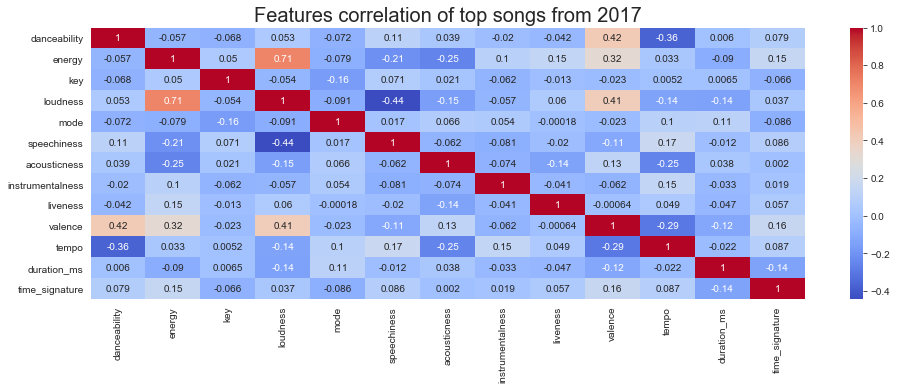

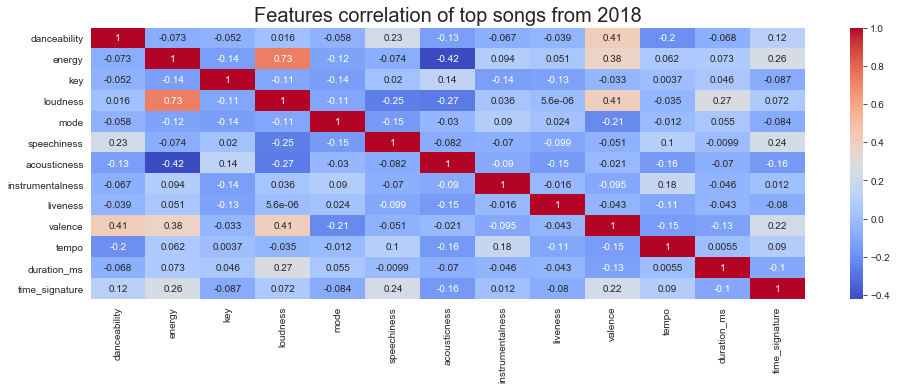

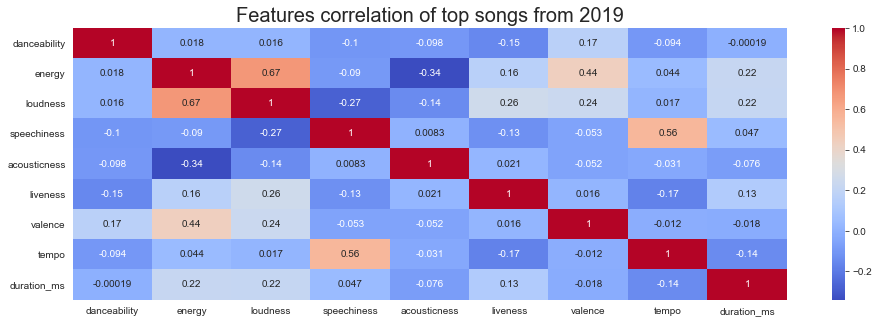

In [17]:
# prepare numerical values from top2017  
numeric = top2017[["danceability","energy","key", "loudness", "mode", "speechiness", 
                   "acousticness", "instrumentalness", "liveness","valence", "tempo",
                   "duration_ms","time_signature"]]
plt.figure(figsize = (16,5))
sns.heatmap(numeric.corr(), cmap="coolwarm", annot=True).set_title("Features correlation of top songs from 2017",
                                                                   fontsize=20)

# prepare numerical values from top2018
numeric2018 = top2018[["danceability","energy","key", "loudness", "mode", "speechiness", 
                       "acousticness", "instrumentalness", "liveness","valence", "tempo",
                       "duration_ms","time_signature"]]
plt.figure(figsize = (16,5))
sns.heatmap(numeric2018.corr(), cmap="coolwarm", annot=True).set_title("Features correlation of top songs from 2018",
                                                                       fontsize=20)

# prepare numerical values from top2019 
numeric2019 = top2019[["danceability","energy", "loudness","speechiness", "acousticness",
                       "liveness", "valence", "tempo", "duration_ms"]]
plt.figure(figsize = (16,5))
sns.heatmap(numeric2019.corr(), cmap="coolwarm", annot=True).set_title("Features correlation of top songs from 2019",
                                                                       fontsize=20)

plt.show()

The most correlated features are energy and loudness, tempo and speechiness so as valence and energy. In our case with songs, this makes absolute sense. If the song is energetic then it is usually louder, as an example, we can think about songs in clubs. Another pair is tempo and speechiness, slow songs usually have quite and clear speechines and the opposite. Valence and energy show us that value of energy makes the song sound happier or sadder. 

In the next, we will take a closer look at these features and see their distribution.

### Analyze most correlated features

Since our data contain multiple numerical variables and we want to analyze how variables relate to each other, we will youse scatterplots for our analysis.

#### Energy and loudness

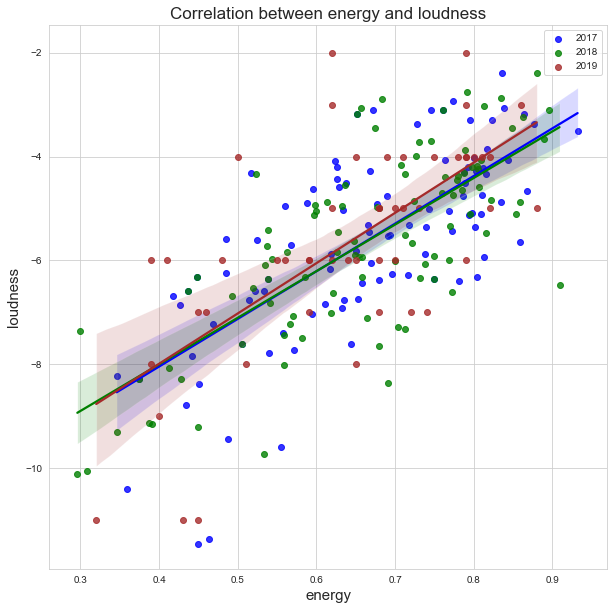

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('X_axi',fontsize=15);
ax.set_ylabel('Y_axis',fontsize=15);
sns.regplot(data = top2017, x = "energy", y ="loudness", color = "blue", label = "2017").set_title('Correlation between energy and loudness', fontsize = 17)
sns.regplot(data = top2018, x = "energy", y ="loudness", color = "green", label = "2018")
sns.regplot(data = top2019, x = "energy", y ="loudness", color = "brown", label = "2019")
plt.legend();

The correlation between loudness and energy is almost linear and all datasets show similar distribution accept that there is a lite difference to the 2019 dataset. Songs from the top 2019 have a bit higher loudness value. Most songs are by energy between 0.5 and 0.9 and by loudness between -8 and -3

#### Tempo and speechiness

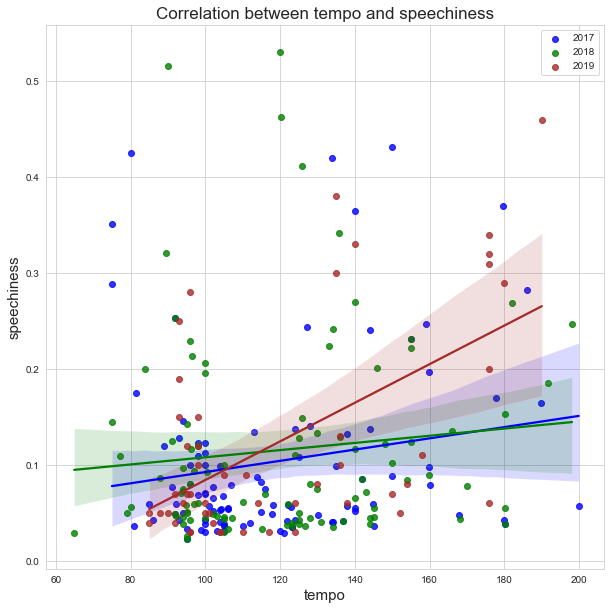

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('X_axi',fontsize=15);
ax.set_ylabel('Y_axis',fontsize=15);
sns.regplot(data = top2017, x = "tempo", y ="speechiness", color = "blue", label = "2017").set_title('Correlation between tempo and speechiness', fontsize = 17)
sns.regplot(data = top2018, x = "tempo", y ="speechiness", color = "green", label = "2018")
sns.regplot(data = top2019, x = "tempo", y ="speechiness", color = "brown", label = "2019")
plt.legend();

The distribution of songs by the correlation between speechiness and tempo has a typical cluster representation. Most songs are by a tempo between 80 and 130 and by speechiness between 0 and 0.15. Data from years 2017 and 2018 have similar values in both features quite contrary to the data from 2019 where more songs have a distribution with a high number of songs that have speechiness over 0.2 by tempo over 140 bits per minute. 

#### Valence and energy.

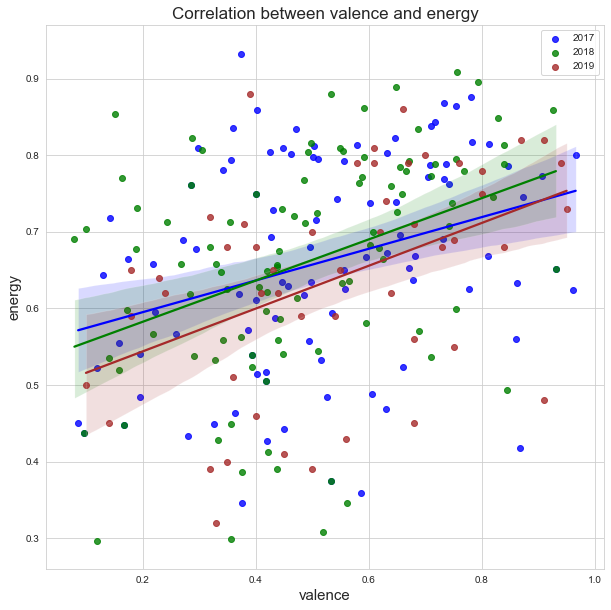

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('X_axi',fontsize=15);
ax.set_ylabel('Y_axis',fontsize=15);
sns.regplot(data = top2017, x = "valence", y ="energy", color = "blue", label = "2017").set_title('Correlation between valence and energy', fontsize = 17)
sns.regplot(data = top2018, x = "valence", y ="energy", color = "green", label = "2018")
sns.regplot(data = top2019, x = "valence", y ="energy", color = "brown", label = "2019")
plt.legend();

All datasets present similar distribution by a correlation between energy and valence. Most of the songs are by valence between 0.2 and 0.8 and by energy between 0.5 and 0.8 which by definition describe.


After summarizing the analysis from most correlated features we can see that the most top songs from three different datasets have speechiness between 0.5 and 1.5 which by Spotify definition likely represents music and other non-speech-like tracks. We need to take a closer look at the dataset from 2019 to understand if they are any trends to see. A lot of popular songs have tempo between 80 and 130 bits per minute, which can be described as a standard tempo based on the cluster representation on the plot. The energy feature is by correlation with different features lies between 0.5 and 0.8 which represent that most of the top songs are fast, loud, and noisy.

### Go through all features and compare their distributions

To find others and specify high correlated features we will go through all given features and analyze their distribution to see some similarities and patterns. 

Since the dataset from 2019 contains only 50 songs in comparison to 100 songs from each dataset of 2017 and 2018 our goal is to concentrate not on the number of songs by value but the distribution curve and similarities between datasets.

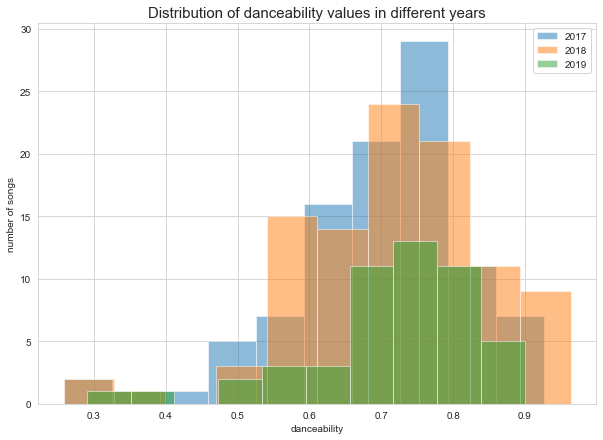

In [21]:
# Show distribution of danceability values
plt.figure(figsize=(10,7))
plt.hist(top2017.danceability, stacked=True, alpha=0.5, label = "2017")
plt.hist(top2018.danceability, stacked=True, alpha=0.5, label = "2018")
plt.hist(top2019.danceability, stacked=True, alpha=0.5, label = "2019")
plt.xlabel("danceability")
plt.ylabel("number of songs")
plt.legend()
plt.title('Distribution of danceability values in different years', fontsize =15)
plt.show()

The distribution of danceability in all datasets have a Gaussian distribution curve whose distribution converges to a normal distribution as the number of samples increases. This shows us some a patter that most songs have danceability values between 0.5 and 0.9. That means that top songs based on the definition from Spotify API are suitable for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. It needs to be mentioned that songs have higher value of danceability by each year, so the highest value from top songs from 2017 was between 0.7 and 0.8 whereas in the dataset from 2018 more songs have values between 0.7 and 0.9 and even by a lower number of songs in the data set of 2019 more songs have values higher than 0,7.


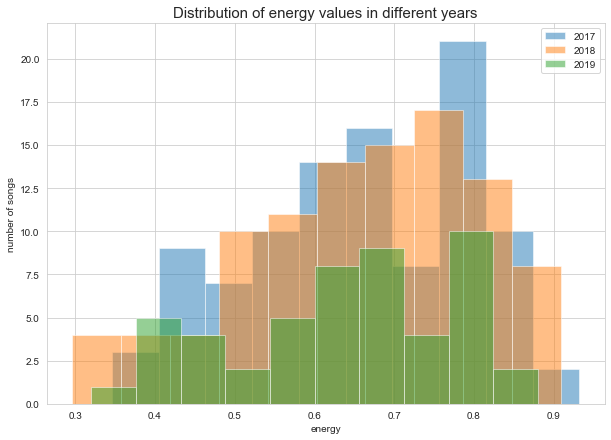

In [22]:
# Show distribution of energy values
plt.figure(figsize=(10,7))
plt.hist(top2017.energy, stacked=True, alpha=0.5, label = "2017")
plt.hist(top2018.energy, stacked=True, alpha=0.5, label = "2018")
plt.hist(top2019.energy, stacked=True, alpha=0.5, label = "2019")
plt.title('Distribution of energy values in different years', fontsize =15)
plt.xlabel("energy")
plt.ylabel("number of songs")
plt.legend()
plt.show()

In comparison with danceability values distribution, energy values have not that clear distribution curve between different years. Values distribution in 2017 is almost the same as the dataset from 2019 with a high number of songs between 0.55 and 0.7 and also songs with every value by 0.8 whereas in dataset 2018 the distribution is between 0.5 and 0.9 without any gaps.

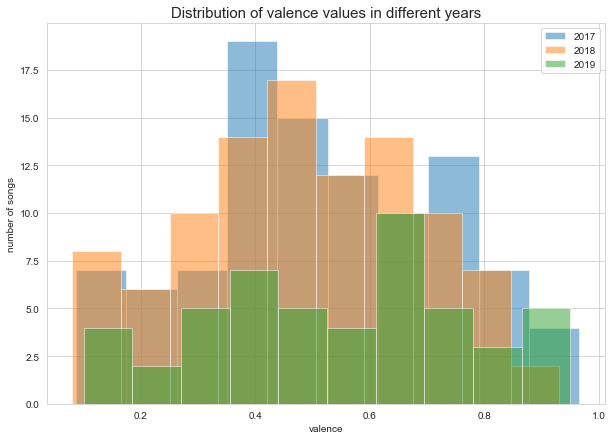

In [23]:
# Show distribution of valence values
plt.figure(figsize=(10,7))
plt.hist(top2017.valence, stacked=True, alpha=0.5, label = "2017")
plt.hist(top2018.valence, stacked=True, alpha=0.5, label = "2018")
plt.hist(top2019.valence, stacked=True, alpha=0.5, label = "2019")
plt.title('Distribution of valence values in different years', fontsize =15)
plt.xlabel("valence")
plt.ylabel("number of songs")
plt.legend()
plt.show()

Similar to the distribution values of energy valence distribution shows no clear patterns. We can notice that more often songs have a distribution between 0.4 and 0.5 and by 0.8.

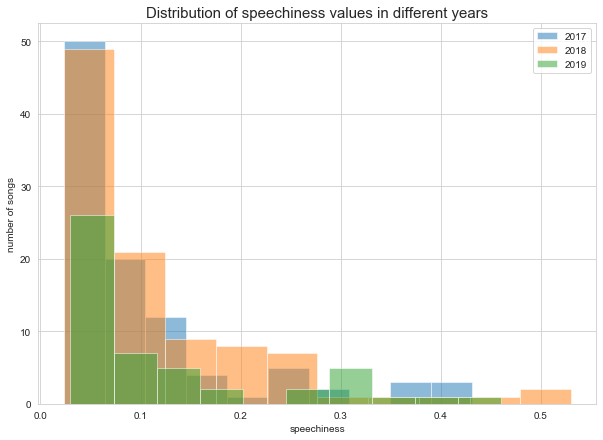

In [24]:
# Show distribution of speechiness values
plt.figure(figsize=(10,7))
plt.hist(top2017.speechiness, stacked=True, alpha=0.5, label = "2017")
plt.hist(top2018.speechiness, stacked=True, alpha=0.5, label = "2018")
plt.hist(top2019.speechiness, stacked=True, alpha=0.5, label = "2019")
plt.title('Distribution of speechiness values in different years', fontsize =15)
plt.xlabel("speechiness")
plt.ylabel("number of songs")
plt.legend()
plt.show()

Similar to our result above the value of speechiness is very low and the highest number of songs from all datasets is between 0.5 and 1.5.

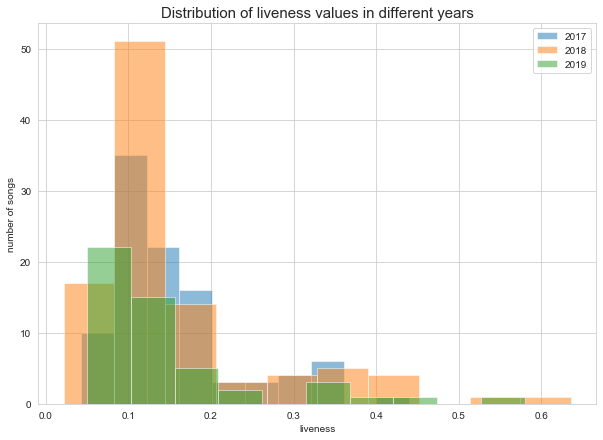

In [25]:
# Show distribution of liveness values
plt.figure(figsize=(10,7))
plt.hist(top2017.liveness, stacked=True, alpha=0.5, label = "2017")
plt.hist(top2018.liveness, stacked=True, alpha=0.5, label = "2018")
plt.hist(top2019.liveness, stacked=True, alpha=0.5, label = "2019")
plt.title('Distribution of liveness values in different years', fontsize =15)
plt.xlabel("liveness")
plt.ylabel("number of songs")
plt.legend()
plt.show()

From the Spotify API definition of liveness, it is difficult to distinguish if the song live. All data have lest liveness distribution than 0.8 which is by definition provides a strong likelihood that the track is live. Most of the top song has a low liveness value between 0.05 and 0.2.

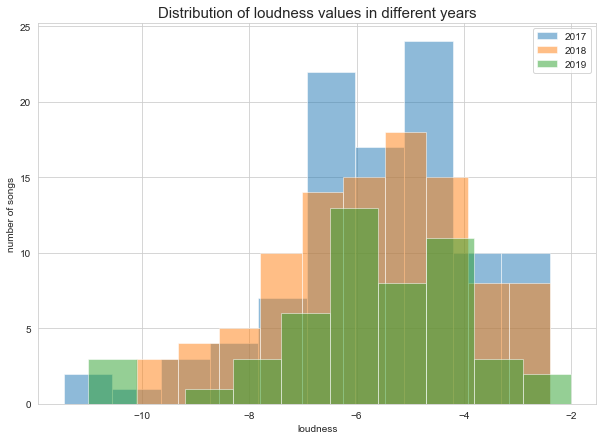

In [26]:
# Show distribution of loudness values
plt.figure(figsize=(10,7))
plt.hist(top2017.loudness, stacked=True, alpha=0.5, label = "2017")
plt.hist(top2018.loudness, stacked=True, alpha=0.5, label = "2018")
plt.hist(top2019.loudness, stacked=True, alpha=0.5, label = "2019")
plt.title('Distribution of loudness values in different years', fontsize =15)
plt.xlabel("loudness")
plt.ylabel("number of songs")
plt.legend()
plt.show()

The higher number of songs in different years has a similar distribution and as we showed above the distribution lies between -7 and -4.

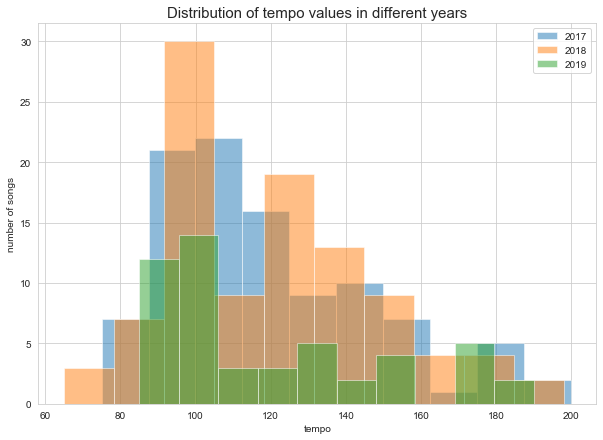

In [27]:
# Show distribution of tempo values
plt.figure(figsize=(10,7))
plt.hist(top2017.tempo, stacked=True, alpha=0.5, label = "2017")
plt.hist(top2018.tempo, stacked=True, alpha=0.5, label = "2018")
plt.hist(top2019.tempo, stacked=True, alpha=0.5, label = "2019")
plt.title('Distribution of tempo values in different years', fontsize =15)
plt.xlabel("tempo")
plt.ylabel("number of songs")
plt.legend()
plt.show()

From the representation of the tempo values distribution, we can specify our previous range. The highest number of songs lies between 90 and 110 tempo values.

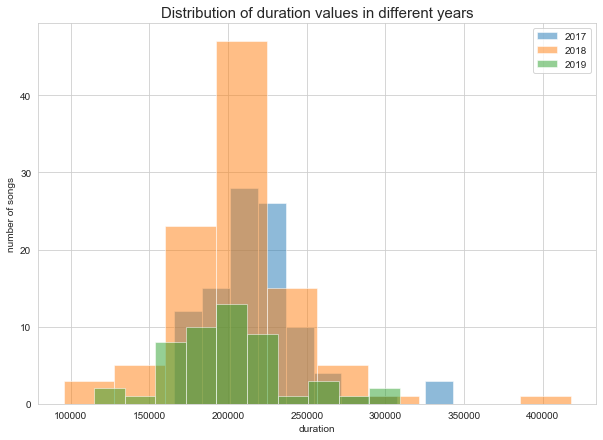

In [28]:
# Show distribution of duration values
plt.figure(figsize=(10,7))
plt.hist(top2017.duration_ms, stacked=True, alpha=0.5, label = "2017")
plt.hist(top2018.duration_ms, stacked=True, alpha=0.5, label = "2018")
plt.hist(top2019.duration_ms, stacked=True, alpha=0.5, label = "2019")
plt.title('Distribution of duration values in different years', fontsize =15)
plt.xlabel("duration")
plt.ylabel("number of songs")
plt.legend()
plt.show()

The Gaussian distribution curve is also to see by duration distribution. Most songs from all datasets have a duration between 170000 and 230000 milliseconds which by translation to minutes are between 2.83 and 3.83 minutes. 

**Summary:** 

After all, analysis based on the dataset from different years we have found that a lot of top song features  most essential in these ranges:

  * duration - between 2.83 and 3.83,

  * tempo - between 90 and 110,
    
  * danceability - between 0.5 and 0.9,
  
  * energy - between 0.55 and 0.8,
  
  * speechiness - between 0.5 and 1.5,
    
  * valence - between 0.4 and 0.5 and by 0.8,
  
  * acousticness - between 0.01 and 0.2
    
  * liveness - between 0.05 and 0.2,
    
  * loundess - between -7 and -4
